### mark_blobs() : (클러스트)분류용 가상 데이터 생성 함수
등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다
- 인수
    - n_samples : 표본 데이터의 수, 디폴트 100
    - n_features : 독립 변수의 수 디폴트 2
    - centers : 정수 또는 [n_centers, n_features] 크기의 배열. 생성할 클러스터의 수 혹은 중심. 디폴트 3
    - cluster_std : 클러스터의 표준 편자 디폴트 1.0
    - center_box : 생성할 클러스터의 바운딩 박스, 디폴트 (-10., 10.0)
- 반환값
    - X : 독립 변수 [n_smaples, n_features]
    - Y : 종속 변수 [n_samples] 크기의 배열

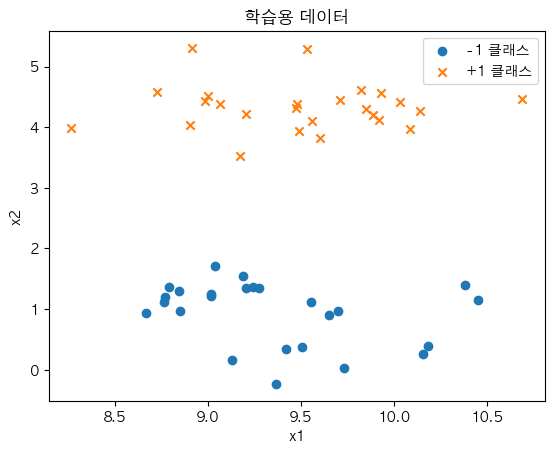

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y=2*y-1
plt.rcParams["font.family"] = 'AppleGothic'
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스") 
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스") 
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()


In [10]:
X

array([[ 9.24222414,  1.36290933],
       [ 9.17124955,  3.52485535],
       [ 8.84264231,  1.29144424],
       [ 9.13144602,  0.15235637],
       [ 8.66686663,  0.93996493],
       [ 8.76869749,  1.19960487],
       [10.45227689,  1.14179259],
       [ 9.4874227 ,  3.93018752],
       [ 9.55834394,  4.10909742],
       [10.03578098,  4.41764995],
       [ 9.70226758,  0.96771277],
       [ 9.53292197,  5.29136138],
       [ 8.90512626,  4.03222184],
       [ 8.91604215,  5.30752241],
       [ 9.42054325,  0.3401709 ],
       [ 9.55313298,  1.11077156],
       [ 9.01498386,  1.21587064],
       [ 8.84910095,  0.97186135],
       [ 9.73389792,  0.02420705],
       [ 9.1891148 ,  1.54564628],
       [ 9.27524446,  1.34568829],
       [ 9.85130417,  4.30586485],
       [ 9.0167434 ,  1.24393257],
       [ 9.70857663,  4.44654264],
       [10.69197928,  4.47249157],
       [ 9.4779887 ,  4.39064298],
       [ 9.2024951 ,  1.34290093],
       [10.14364725,  4.26904052],
       [ 9.00096813,

In [11]:
y

array([-1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
        1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1])

##### C
- 잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리로 데이터점이 잘못 분류된 정도를 나타낸다
- SVM모델이 오류를 어느정도 허용할 것인지 파라미터 C를 통해 지정
- C값이 클수록 하드마진(오류 허용 안함) , 작을수록 소프트 마진(오류 허용)
##### gamma
- 결정경계를 얼마나 유연하게 그을 것인지 정해주는 역할
- gamma 값을 높이면 학습 데이터에 많이 의존해서 결정 경계를 구불구불 긋게 된다. 오버피팅을 초래
- gamma 값을 낮추면 학습 데이터에 별로 의존하지 않고 결정 경계를 직선에 가깝게 긋게 된다. 언더피팅 초래
C와 gamma를 지나치게 높게 잡는다면 오버피팅이 될수 있다
##### kernel
- 판별 경계를 찾기 위한 내적 함수 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed', default는 rbf

In [2]:
from sklearn.svm import SVC
# 슬랙변수(c) : 잘못 분류된 데이터로부터 해당 클래스의 결정 경계까지의 거리로 데이터점이 잘못 분류된 정도를 나타낸다.
# 커널(kernel) : 판별 경계를 찾기 위핚 내적 함수 
model = SVC(kernel='linear', C=1e10).fit(X, y) 
model

SVC(C=10000000000.0, kernel='linear')

### SVC를 사용하여 모형을 구하면 다음과 같은 속성값을 가진다
- n_support_ : 각 클래스의 서포트 벡터의 개수
- support_ : 각 클래스의 서포트 벡터의 인덱스
- support_vectors_ : 각 클래스의 서포트의 x값
- coef_ : 기울기
- intercept_ : 절편
- dual_coef : 각 원소가 aiyi로 이루어진 벡터. 음의 계수와 양의 계수를 나타낸다

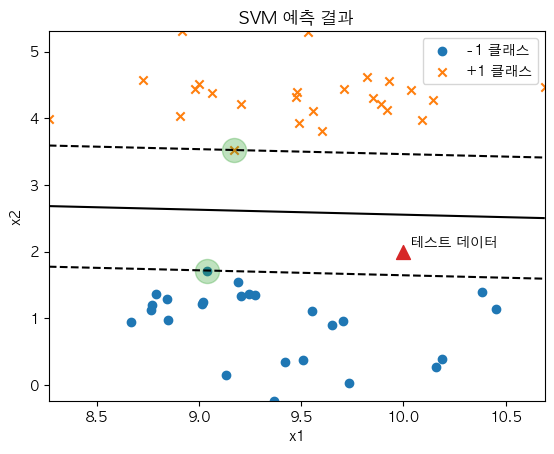

In [3]:
import numpy as np
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)

for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])  # 판별 함수 판별함수값이 음수이면 0인 클래스 양수이면 1인 클래스로 판별
    Z[i, j] = p[0]

levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)
x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")
plt.show()


In [4]:
x_new = [10, 2]
model.decision_function([x_new])

array([-0.61101582])

In [6]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

In [14]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold

X,Y=make_blobs(n_samples=5, random_state = 42, shuffle = True)

estimator=SVC()
cv=KFold(n_splits=5, random_state=42, shuffle=True)
parameters = {
    'C' : [0.1,1],
    'gamma': [0.000000001, 0.00000001, 0.0000001, 0.000001,0.00001],
    'kernel' :['linear', 'poly', 'rbf', 'sigmoid']
}

model_GV = GridSearchCV(estimator = estimator,param_grid=parameters, cv=cv, verbose=-1, refit=True)
model_GV.fit(X,Y)

print(model_GV.best_estimator_);print()
print(model_GV.best_params_);print()
print(model_GV.best_score_);print()

SVC(C=0.1, gamma=1e-09, kernel='linear')

{'C': 0.1, 'gamma': 1e-09, 'kernel': 'linear'}

0.8



In [19]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_data = iris.data[(iris.target == 0) | (iris.target == 1), :2]
y = iris.target[(iris.target == 0) | (iris.target == 1)]
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state=30)
svm = SVC(kernel="linear", C=1e10)
svm.fit(X_train, y_train)

SVC(C=10000000000.0, kernel='linear')

In [20]:
pred_y = svm.predict(X_test) 
confusion_matrix(pred_y, y_test)

array([[12,  0],
       [ 0, 18]])

/Users/choejm/AI02/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/Users/choejm/AI02/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


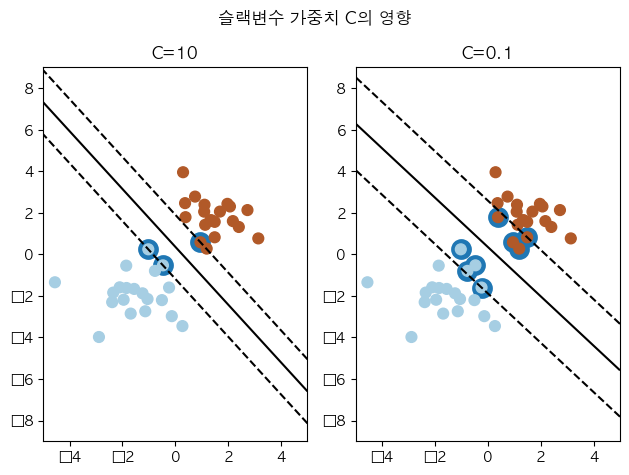

In [21]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]] 
Y = [-1] * 20 + [1] * 20
plotnum = 1
for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y) 
    xx = np.linspace(-5, 5)
    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]
    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles) 
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)

    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired) 
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)
    plotnum += 1
plt.suptitle("슬랙변수 가중치 C의 영향") 
plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [23]:
iris = load_iris()
X_data = iris.data[(iris.target == 0) | (iris.target == 1), :2]
y = iris.target[(iris.target == 0) | (iris.target == 1)]
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3) 
svm = SVC(kernel="linear", C=1e10)
svm.fit(X_train, y_train)


SVC(C=10000000000.0, kernel='linear')

In [25]:
pred_y = svm.predict(X_test) 
confusion_matrix(pred_y, y_test)

array([[15,  0],
       [ 0, 15]])

/Users/choejm/AI02/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
/Users/choejm/AI02/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


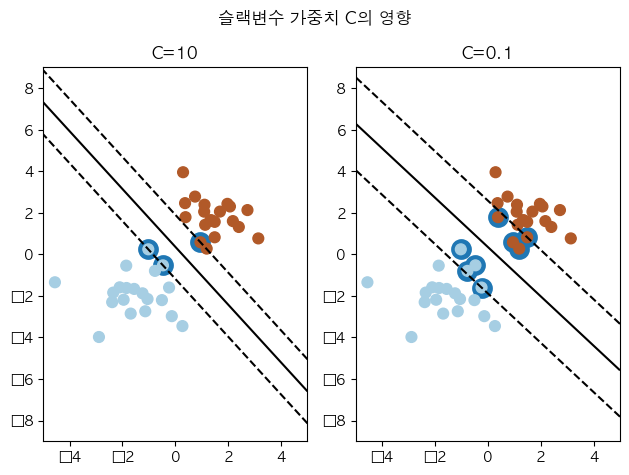

In [26]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]] 
Y = [-1] * 20 + [1] * 20
plotnum = 1

for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y) 
    xx = np.linspace(-5, 5)
    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]
    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles) 
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    

    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired) 
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)
    plotnum += 1

plt.suptitle("슬랙변수 가중치 C의 영향") 
plt.tight_layout()
plt.show()

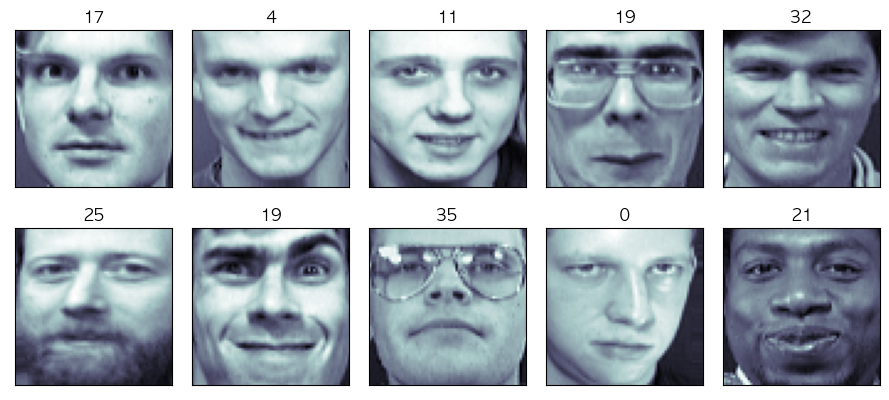

In [5]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
N=2
M =5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone) 
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout() 
plt.show()

In [6]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

# 이미지 데이터는 2차원일 경우가 많은데( 아래 같은 경우도 64 64 구조)
# 머신러닝을 할려면 1차원으로 만들어줘야한다.

In [7]:
faces.data.shape

(400, 4096)

In [8]:
faces.images.shape

(400, 64, 64)

In [9]:
faces.target[:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [18]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [40]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

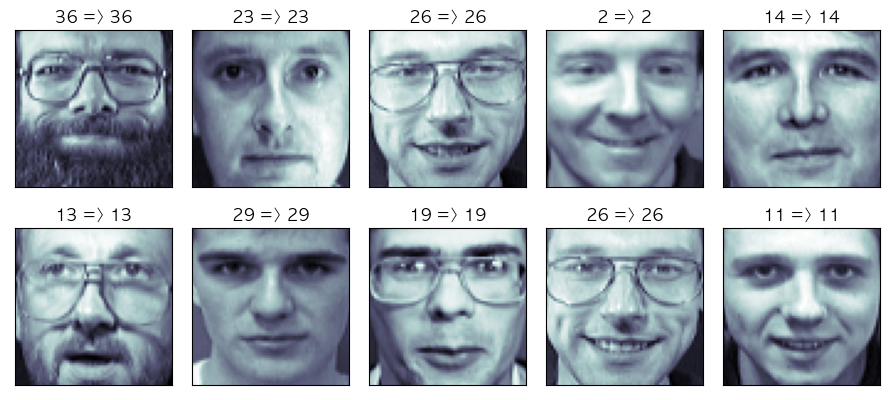

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)
N=2
M =5
np.random.seed(5)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone) 
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" %(y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import classification_report, accuracy_score
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test) 
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))
print("------------")
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

In [1]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
df=pd.read_csv('bmi.csv')
df

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:2], df.iloc[:,2])

In [4]:
X_train

,height,weight
15779,159,35
10897,159,37
18708,186,63
17290,144,39
9733,121,65
...,...,...
16288,182,63
7284,138,76
17133,151,61
10411,131,54


In [6]:
model = svm.SVC(kernel='linear', C=10).fit(X_train, y_train) 
model

SVC(C=10, kernel='linear')

In [7]:
metrics.accuracy_score(y_test, model.predict(X_test))

0.9798

In [9]:
print(metrics.classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         fat       0.98      0.99      0.99      1812
      normal       0.97      0.96      0.97      1576
        thin       0.98      0.98      0.98      1612

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



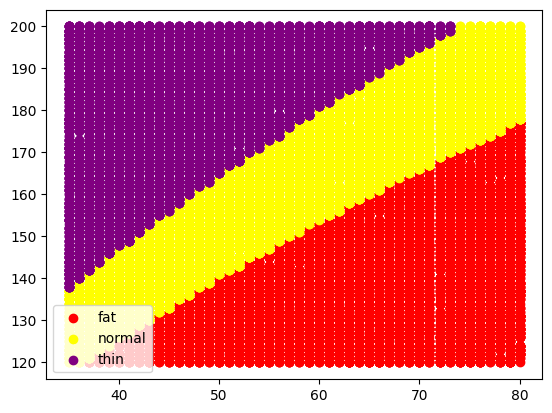

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
# Pandas로 CSV 파일 읽어 들이기
tbl = pd.read_csv("bmi.csv", index_col=2) # 그래프 그리기 시작
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# 서브 플롯 전용 - 지정핚 레이블을 임의의 색으로 칠하기 
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)
scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")
ax.legend()
plt.savefig("bmi-test.png") 
plt.show()

In [12]:
tbl

,height,weight
label,,
fat,142,62
fat,142,73
normal,177,61
thin,187,48
fat,153,60
...,...,...
fat,122,58
normal,193,69
thin,193,37
